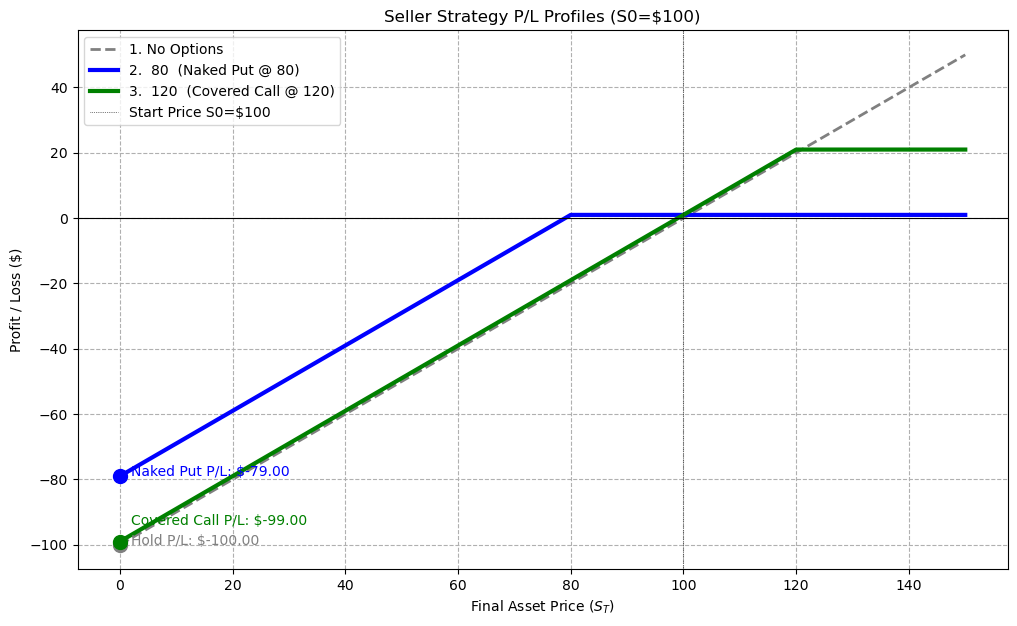

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# --- 0. 解决字体问题 ---
plt.rcParams['font.family'] = 'sans-serif' 

# --- 1. 定义变量和假设 ---
S0 = 100  # 标的资产现价
K_call = 120  # 看涨期权行权价
K_put = 80  # 看跌期权行权价
Premium_call = 1.00  # 收到的看涨权利金
Premium_put = 1.00  # 收到的看跌权利金
Stock_Cost = 100 # 股票成本

# 定义最终资产价格范围 (X 轴)
S_T = np.arange(0, 151, 1) # 从 0 开始

# --- 2. 计算卖方的收益/损失 (P/L) ---

# 1. 不卖期权 (Hold Asset Baseline)
# P/L = (最终价格 - 初始成本)
Profit_Hold_Asset = S_T - Stock_Cost

# 2. 裸卖看跌期权 (Naked Sell Put) @ K=80
# P/L = 权利金 - Max(0, K_put - S_T)
Profit_Naked_Put = Premium_put - np.maximum(0, K_put - S_T)

# 3. 备兑看涨期权 (Covered Call) @ K=120
# P/L = (股票的P/L) + (期权的P/L)
# P/L = (S_T - Stock_Cost) + (Premium_call - Max(0, S_T - K_call))
profit_covered_call = np.where(
    S_T < K_call, 
    (S_T - Stock_Cost) + Premium_call, 
    (K_call - Stock_Cost) + Premium_call
)

# --- 3. 绘制图形 ---
plt.figure(figsize=(12, 7))

# 绘制三条卖方收益曲线
plt.plot(S_T, Profit_Hold_Asset, label='1. No Options', color='gray', linestyle='--', linewidth=2)
plt.plot(S_T, Profit_Naked_Put, label=f'2.  80  (Naked Put @ {K_put})', color='blue', linewidth=3)
plt.plot(S_T, profit_covered_call, label=f'3.  120  (Covered Call @ {K_call})', color='green', linewidth=3)

# --- 4. 辅助线和图表装饰 ---
plt.axhline(0, color='black', linestyle='-', linewidth=0.8)
plt.axvline(S0, color='black', linestyle=':', linewidth=0.5, label=f'Start Price S0=${S0}')

# 突出显示 S_T = 0 时的点
plt.scatter(0, Profit_Hold_Asset[0], color='gray', s=100, zorder=5)
plt.text(2, Profit_Hold_Asset[0], f'Hold P/L: ${Profit_Hold_Asset[0]:.2f}', color='gray')

plt.scatter(0, Profit_Naked_Put[0], color='blue', s=100, zorder=5)
plt.text(2, Profit_Naked_Put[0], f'Naked Put P/L: ${Profit_Naked_Put[0]:.2f}', color='blue')

plt.scatter(0, profit_covered_call[0], color='green', s=100, zorder=5)
plt.text(2, profit_covered_call[0] + 5, f'Covered Call P/L: ${profit_covered_call[0]:.2f}', color='green')

plt.title(f'Seller Strategy P/L Profiles (S0=${S0})')
plt.xlabel('Final Asset Price ($S_T$)')
plt.ylabel('Profit / Loss ($)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

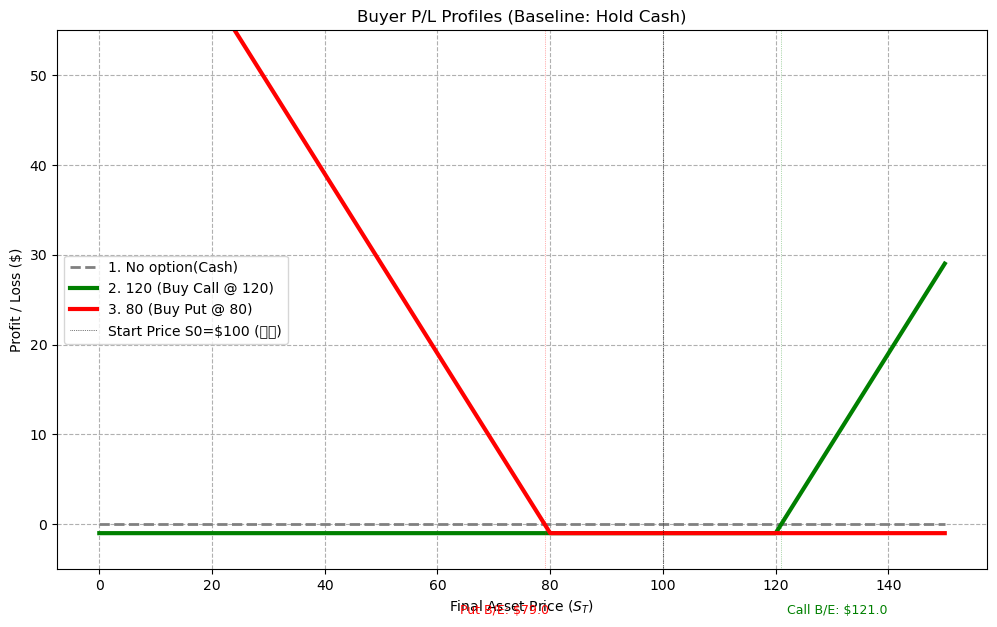

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# --- 0. 解决字体问题 ---
plt.rcParams['font.family'] = 'sans-serif' 

# --- 1. 定义变量和假设 ---
S0_reference = 100  # 仅作为参考的当前资产价格
K_call = 120  # 看涨期权行权价
K_put = 80  # 看跌期权行权价
Premium_call = 1.00  # 支付的看涨权利金
Premium_put = 1.00  # 支付的看跌权利金

# 定义最终资产价格范围 (X 轴)
S_T = np.arange(0, 151, 1) # 从 0 开始

# --- 2. 计算买方的收益/损失 (P/L) ---

# 1. 不买期权 (Hold Cash Baseline)
# P/L 始终为 0
Profit_Hold_Cash = np.zeros_like(S_T)

# 2. 买入看涨期权 (Buy Call) @ K=120
# P/L = Max(0, S_T - K_call) - Premium_call
Profit_Buy_Call = np.maximum(0, S_T - K_call) - Premium_call

# 3. 买入看跌期权 (Buy Put) @ K=80
# P/L = Max(0, K_put - S_T) - Premium_put
Profit_Buy_Put = np.maximum(0, K_put - S_T) - Premium_put


# --- 3. 绘制图形 ---
plt.figure(figsize=(12, 7))

# 绘制三条买方收益曲线
plt.plot(S_T, Profit_Hold_Cash, label='1. No option(Cash)', color='gray', linestyle='--', linewidth=2)
plt.plot(S_T, Profit_Buy_Call, label=f'2. 120 (Buy Call @ {K_call})', color='green', linewidth=3)
plt.plot(S_T, Profit_Buy_Put, label=f'3. 80 (Buy Put @ {K_put})', color='red', linewidth=3)

# --- 4. 辅助线和图表装饰 ---
# 零利润线 (P/L = 0) 已经由灰色虚线代表

# 资产现价标记
plt.axvline(S0_reference, color='black', linestyle=':', linewidth=0.5, label=f'Start Price S0=${S0_reference} (参考)')

# 盈亏平衡点
Breakeven_Call = K_call + Premium_call
plt.axvline(Breakeven_Call, color='green', linestyle=':', linewidth=0.5, alpha=0.6)
plt.text(Breakeven_Call + 1, -10, f'Call B/E: ${Breakeven_Call}', color='green', fontsize=9)

Breakeven_Put = K_put - Premium_put
plt.axvline(Breakeven_Put, color='red', linestyle=':', linewidth=0.5, alpha=0.6)
plt.text(Breakeven_Put - 15, -10, f'Put B/E: ${Breakeven_Put}', color='red', fontsize=9)


plt.title(f'Buyer P/L Profiles (Baseline: Hold Cash)')
plt.xlabel('Final Asset Price ($S_T$)')
plt.ylabel('Profit / Loss ($)')
plt.legend()
plt.grid(True, linestyle='--')
plt.ylim(-5, 55) # 调整Y轴范围以便观察
plt.show()